In [1]:
d3 = require("/usr/local/lib/node_modules/d3");
jsdom = require("/usr/local/lib/node_modules/jsdom");
fs = require("fs");
undefined

In [2]:
raw_data = d3.csvParse(fs.readFileSync("sent_matrix.csv", 'utf8'), d3.autoType);
undefined

In [3]:
width = 640;
height = 640;
outerRadius = Math.min(width, height) * 0.5 - 40;
innerRadius = outerRadius - 20;
undefined

In [4]:
color = d3.scaleOrdinal()
    .domain(d3.range(11))
    .range(d3.range(11).map(x => d3.interpolateYlGnBu(x/11)));
ribbon = d3.ribbon()
    .radius(innerRadius);
arc = d3.arc()
    .innerRadius(innerRadius)
    .outerRadius(outerRadius);
chord = d3.chord()
    .padAngle(0.05)
    .sortSubgroups(d3.descending);
formatValue = d3.formatPrefix(",.0", 1e3);
undefined

In [5]:
function groupTicks(d, step) {
  const k = (d.endAngle - d.startAngle) / d.value;
  return d3.range(0, d.value, step).map(value => {
    return {value: value, angle: value * k + d.startAngle};
  });
}
function groupName(d) {
  return raw_data.columns[d.index];
}

In [6]:
transpose = m => m[0].map((x,i) => m.map(x => x[i]));
let n = raw_data.length;
let data = new Array(n);
for (let i = 0; i < n; i++) {
    data[i] = Object.values(raw_data[i]);
}
data = transpose(data);
undefined

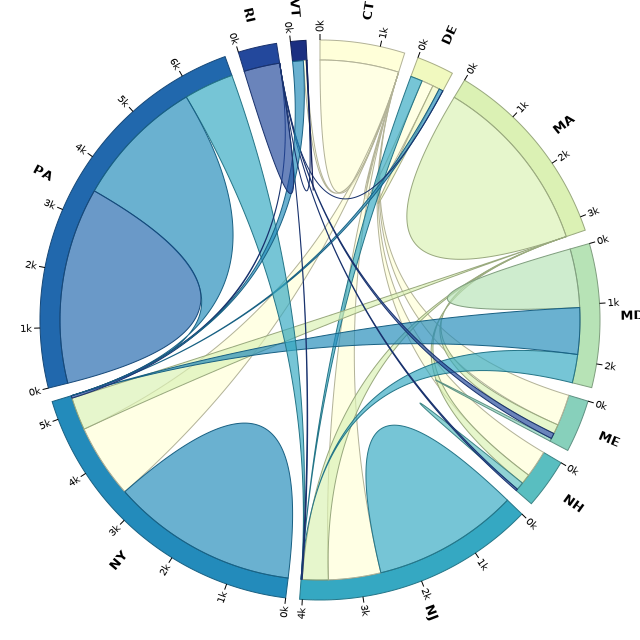

In [7]:
var document = new jsdom.JSDOM("<html><body></body></html>");
var svg = d3.select(document.window.document.body).append("svg");

svg
    .attr("width", 600)
    .attr("viewBox", [-width / 2, -height / 2, width, height])
    .attr("font-size", 10)
    .attr("font-family", "sans-serif");

var chords = chord(data);

var group = svg.append("g")
    .selectAll("g")
    .data(chords.groups)
    .join("g");

group.append("path")
    .attr("fill", d => color(d.index))
    .attr("stroke", d => d3.rgb(color(d.index)).darker())
    .attr("d", arc);

var groupTick = group.append("g")
    .selectAll("g")
    .data(d => groupTicks(d, 1e3))
    .join("g")
    .attr("transform", d => `rotate(${d.angle * 180 / Math.PI - 90}) translate(${outerRadius},0)`);

groupTick.append("line")
    .attr("stroke", "#000")
    .attr("x2", 6);

groupTick
    .filter(d => d.value % 1e3 === 0)
    .append("text")
    .attr("x", 8)
    .attr("dy", ".35em")
    .attr("transform", d => d.angle > Math.PI ? "rotate(180) translate(-16)" : null)
    .attr("text-anchor", d => d.angle > Math.PI ? "end" : null)
    .text(d => formatValue(d.value));

group
    .append("g")
    .attr("transform", d => `rotate(${(d.startAngle + d.endAngle) / 2 * 180 / Math.PI - 90}) translate(${outerRadius+25},0)`)
    .join("g")
    .append("text")
    .attr("font-size", 13)
    .attr("font-weight", "bold")
    .attr("x", 8)
    .attr("dy", "0.35em")
    .attr("text-anchor", "middle")
    .attr("transform", d => d.startAngle > Math.PI ? "rotate(180) translate(-16)" : null)
    .text(d => groupName(d));

svg.append("g")
    .attr("fill-opacity", 0.67)
    .selectAll("path")
    .data(chords)
    .join("path")
    .attr("d", ribbon)
    .attr("fill", d => color(d.target.index))
    .attr("stroke", d => d3.rgb(color(d.target.index)).darker());

$$.svg(svg.node().outerHTML);